In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn.hmm import GaussianHMM


In [2]:
daily = pd.read_csv("../data/raw/features_daily.csv", index_col=0, parse_dates=True)
weekly = pd.read_csv("../data/raw/features_weekly.csv", index_col=0, parse_dates=True)


In [3]:
def hmm_aic_bic(X, n_states):
    model = GaussianHMM(
        n_components=n_states,
        covariance_type="full",
        n_iter=500,
        random_state=42
    )
    model.fit(X)
    
    log_likelihood = model.score(X)
    
    n_samples, n_features = X.shape
    
    # Number of parameters
    n_params = (
        n_states * (n_states - 1) +               # transitions
        n_states * n_features +                   # means
        n_states * (n_features * (n_features + 1) / 2)  # covariances
    )
    
    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + n_params * np.log(n_samples)
    
    return aic, bic


In [4]:
states_range = range(2, 7)

daily_aic, daily_bic = [], []
weekly_aic, weekly_bic = [], []

for s in states_range:
    aic_d, bic_d = hmm_aic_bic(daily.values, s)
    aic_w, bic_w = hmm_aic_bic(weekly.values, s)
    
    daily_aic.append(aic_d)
    daily_bic.append(bic_d)
    
    weekly_aic.append(aic_w)
    weekly_bic.append(bic_w)


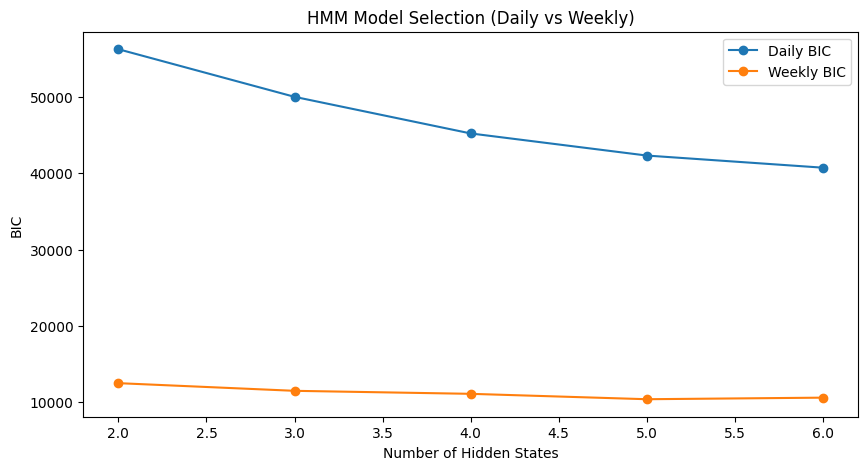

In [5]:
plt.figure(figsize=(10,5))

plt.plot(states_range, daily_bic, marker="o", label="Daily BIC")
plt.plot(states_range, weekly_bic, marker="o", label="Weekly BIC")

plt.xlabel("Number of Hidden States")
plt.ylabel("BIC")
plt.title("HMM Model Selection (Daily vs Weekly)")
plt.legend()
plt.show()
